In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import network_mod as net_fn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/' 
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

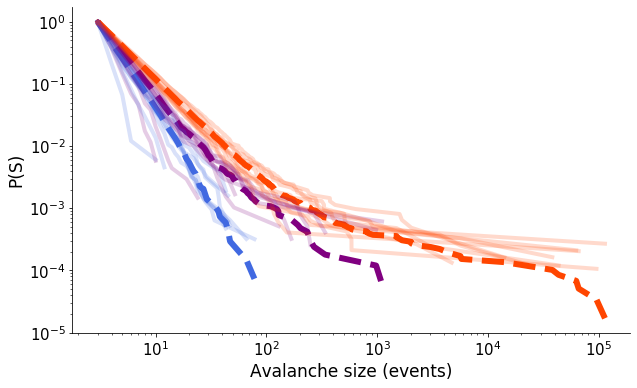

In [408]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------

labels = ['10$^1$','10$^1$','10$^1$','10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (10,6))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =6 , markersize = 1, alpha = 1, c = 'royalblue')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =6 , markersize = 1, alpha = 1, c = 'purple')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =6 , markersize = 1, alpha = 1, c = 'orangered')

for i in range(len(bln_distlist)):
    avdistcut = bln_distlist[i]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =4 , markersize = 1, alpha = 0.2, c = 'royalblue')
    sns.reset_orig()
    avdistcut = pre_distlist[i]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =4 , markersize = 1, alpha = 0.2, c = 'purple')
    avdistcut = p20_distlist[i]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =4 , markersize = 1, alpha = 0.2, c = 'orangered')
    
    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.ylim(bottom = 0.00001)  
#plt.xlim(right = 1000)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)
plt.savefig(Ffig + 'model_fits.svg', transparent = True)
plt.show()

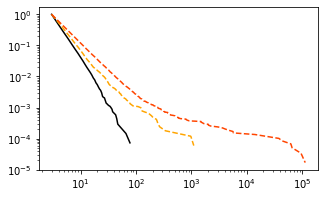

In [390]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdata + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [78]:
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*lab*')
coord_l

['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_labcoord.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_labcoord.npy',
 'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_labcoord.npy',
 'PTZ-W

In [96]:
all_coord.shape

(212452, 3)

In [97]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=500, random_state=0).fit(all_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((all_coord, klab))
#np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [98]:
space_coord_labels

array([[355, 435,  97, 438],
       [409, 569, 132, 172],
       [459, 511, 118, 154],
       ...,
       [317, 416, 225,  34],
       [251, 535, 216, 112],
       [333, 396, 229, 451]])

In [101]:
#Average cells by labels to make new cluster
coords = space_coord_labels
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]


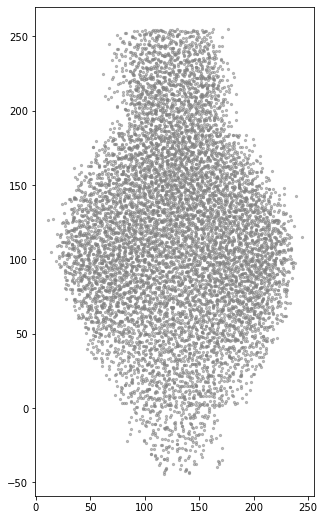

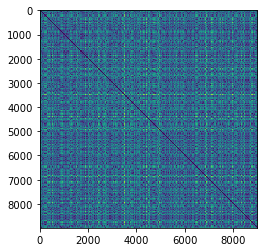

In [5]:
#Visualise nodes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     
import glob

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdata + 'PTZ-WILDTYPE')

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,9))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,1], nodes[:,0], s = 5, color = 'grey' , alpha = 0.5)
#plt.savefig('k_means_brain.png', transparent = True)

plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()


# Connect network

## Network types

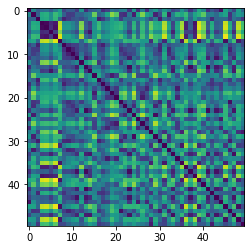

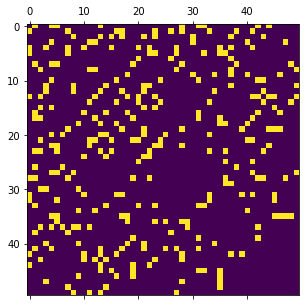

In [2]:
#small world network
from sklearn.metrics.pairwise import euclidean_distances

#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 5
plt.imshow(dist)
plt.show()

ws = net_fn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()

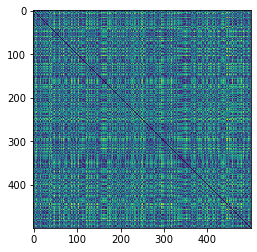

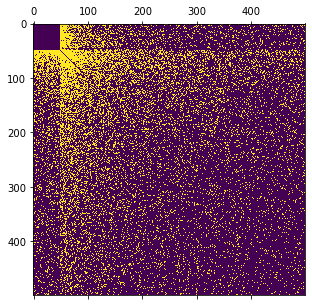

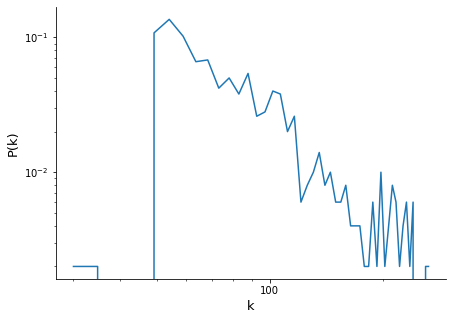

In [389]:
#Scale free network

from sklearn.metrics.pairwise import euclidean_distances

os.chdir(Fdata + experiment)

node = sorted(glob.glob('knodes*'))
nodes = np.load(node[0])

#Barabasi albert - scale free
Nnodes    = 500
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 50
plt.imshow(dist)
plt.show()

ba = net_fn.ba_netsim(dist).net_generate(k, 'directed').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig('ba_degree.svg', transparent = True)
plt.show()

# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* c = clustering coefficient


In [6]:
#Single parameter for scaling and relaxing
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

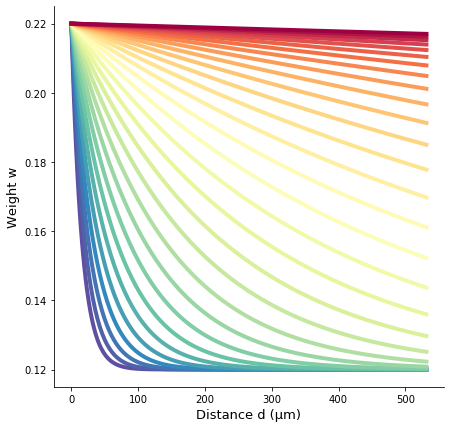

In [7]:
from matplotlib import cm

#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, soften, s, r):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights


#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2

#Plot each s value
fig, axarr = plt.subplots(figsize = (7,7))  
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)

for r in range(len(r_vals)):
    axarr.plot(distance / 0.625, dist2edge(distance, divisor, soften, s, r_vals[r]) ,  c=colors[r], linewidth = 4)

axarr.set_ylabel('Weight w', size = '13')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)   
#plt.savefig(Ffig + 'r_scaling.svg', transparent = True)
plt.show()

# Add dynamics
* network of LIF neurons

In [8]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

INFO       Cache size for target "cython": 5666 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/Users/dominicburrows/Library/Caches/cython/brian_extensions" directory. [brian2]


In [11]:
bln_list = sorted(glob.glob('*randbase*binarised*'))
gen_list = sorted(glob.glob('*_ictal*binarised*'))
pre_list = sorted(glob.glob('*pre*binarised*'))
bln_list, pre_list, gen_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  '

<Figure size 720x432 with 0 Axes>

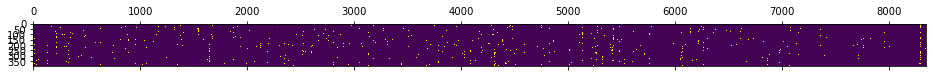

<Figure size 720x432 with 0 Axes>

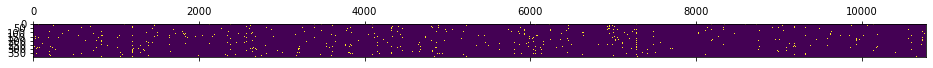

<Figure size 720x432 with 0 Axes>

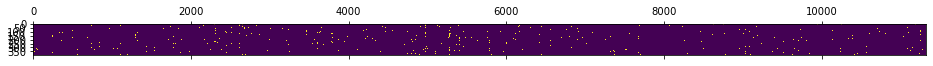

<Figure size 720x432 with 0 Axes>

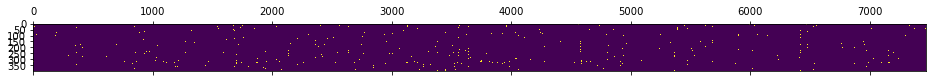

<Figure size 720x432 with 0 Axes>

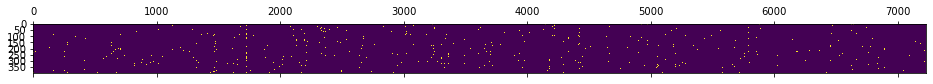

<Figure size 720x432 with 0 Axes>

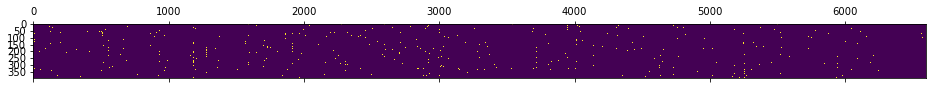

<Figure size 720x432 with 0 Axes>

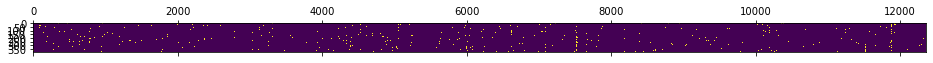

<Figure size 720x432 with 0 Axes>

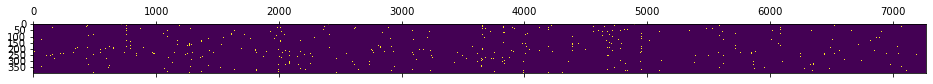

<Figure size 720x432 with 0 Axes>

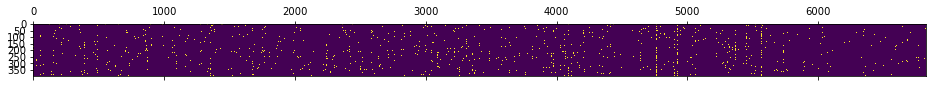

<Figure size 720x432 with 0 Axes>

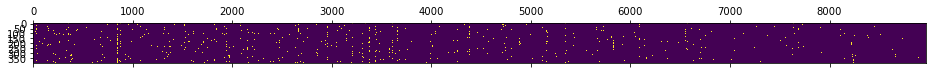

<Figure size 720x432 with 0 Axes>

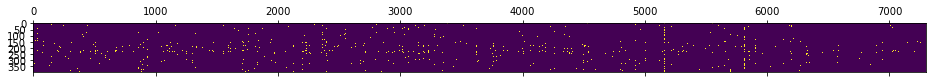

<Figure size 720x432 with 0 Axes>

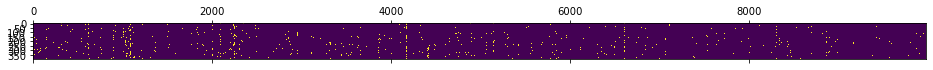

<Figure size 720x432 with 0 Axes>

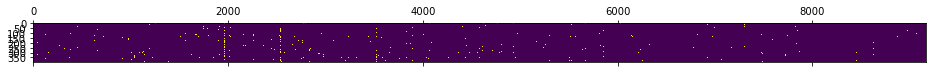

<Figure size 720x432 with 0 Axes>

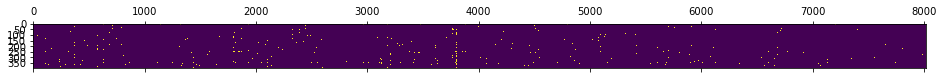

<Figure size 720x432 with 0 Axes>

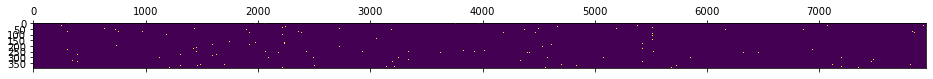

<Figure size 720x432 with 0 Axes>

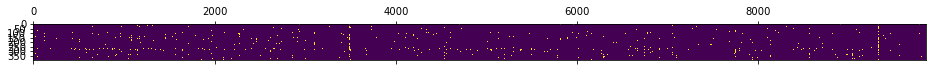

<Figure size 720x432 with 0 Axes>

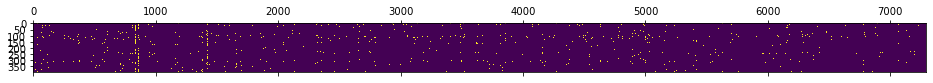

<Figure size 720x432 with 0 Axes>

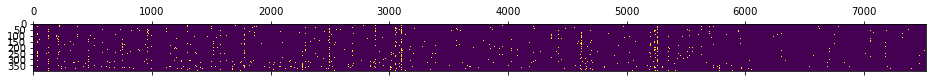

<Figure size 720x432 with 0 Axes>

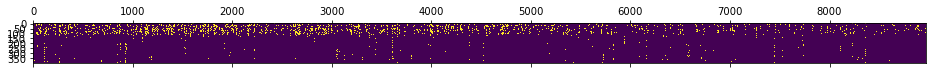

<Figure size 720x432 with 0 Axes>

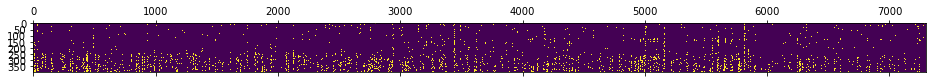

<Figure size 720x432 with 0 Axes>

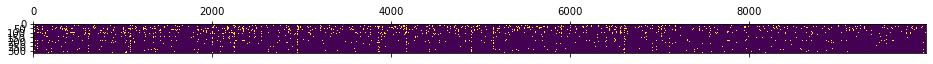

<Figure size 720x432 with 0 Axes>

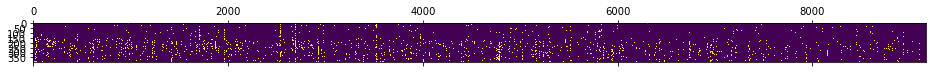

<Figure size 720x432 with 0 Axes>

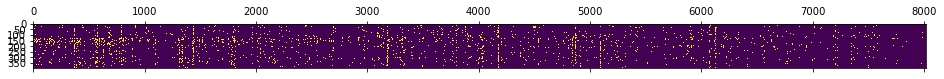

<Figure size 720x432 with 0 Axes>

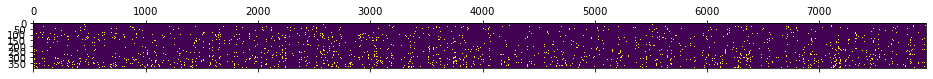

<Figure size 720x432 with 0 Axes>

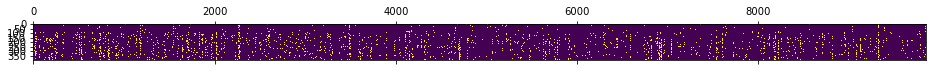

<Figure size 720x432 with 0 Axes>

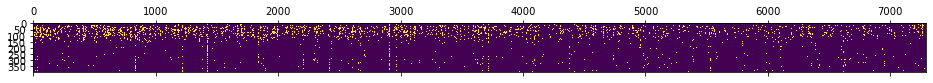

<Figure size 720x432 with 0 Axes>

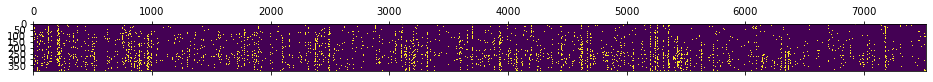

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
b_data_mat = bln_list
for i in range(len(bln_list)):
    plt.figure(figsize=(10,6))
    curr = np.load(b_data_mat[i])
    plot1 = plt.matshow(curr.T)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
p_data_mat = pre_list
for i in range(len(bln_list)):
    plt.figure(figsize=(10,6))
    curr = np.load(p_data_mat[i])
    plot1 = plt.matshow(curr.T)
plt.show()

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
sz_data_mat = gen_list
for i in range(len(bln_list)):
    plt.figure(figsize=(10,6))
    curr = np.load(sz_data_mat[i])
    plot1 = plt.matshow(curr.T)
plt.show()

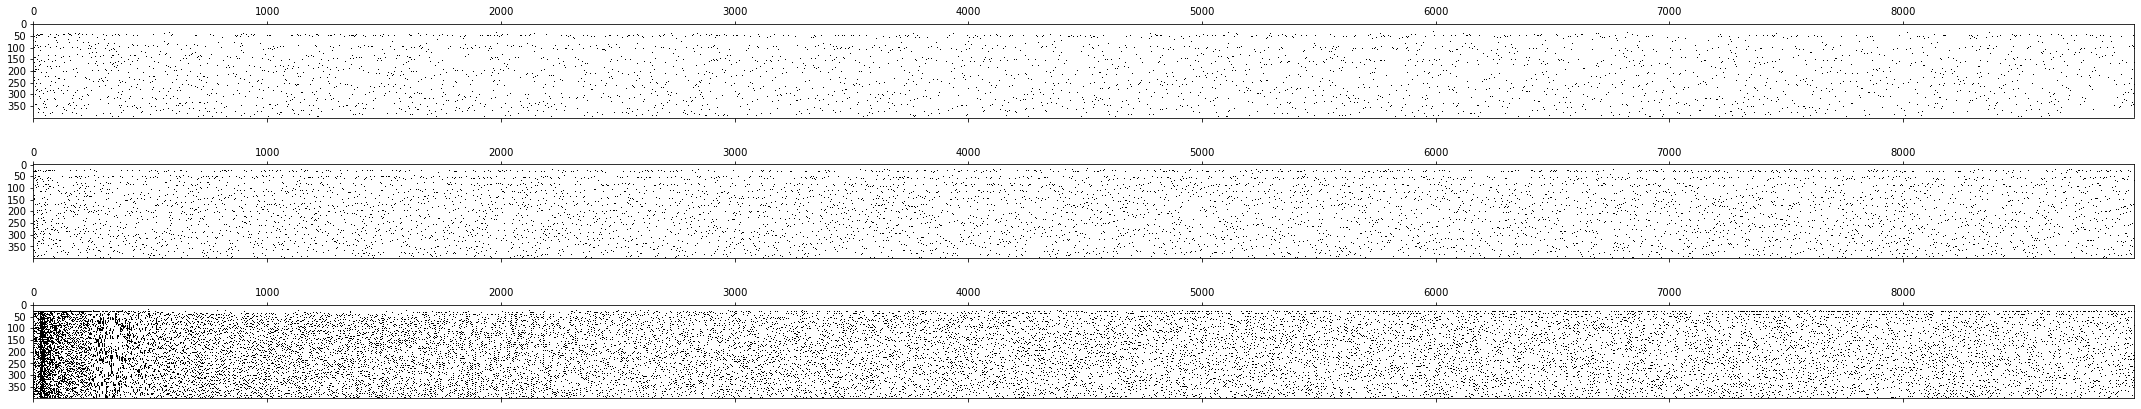

In [37]:
import seaborn as sns
#Parameters
k_list = [7,6, 31]
v_th_list = [20, 16 , 17]#spike threshold
r_list = [5,0,1] #relax parameter


bind_list = list(range(len(r_list)))
sns.reset_orig()
for i in range(len(r_list)):
    bind_list[i], spikes, v, spike_monitor = net_fn.run_net(sim_time, k_list[i], v_th_list[i], r_list[i], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    
fig, axarr = plt.subplots(3,1,figsize = (30,6))
fig.tight_layout()

for i in range(len(bind_list)):
    
    curr = bind_list[i]
    axarr[i].matshow(curr.T, cmap = 'Greys')
plt.show()

In [245]:
spike_monitor.t[:5] * 10000

array([0.335, 0.34 , 0.344, 0.347, 0.349]) * ksecond

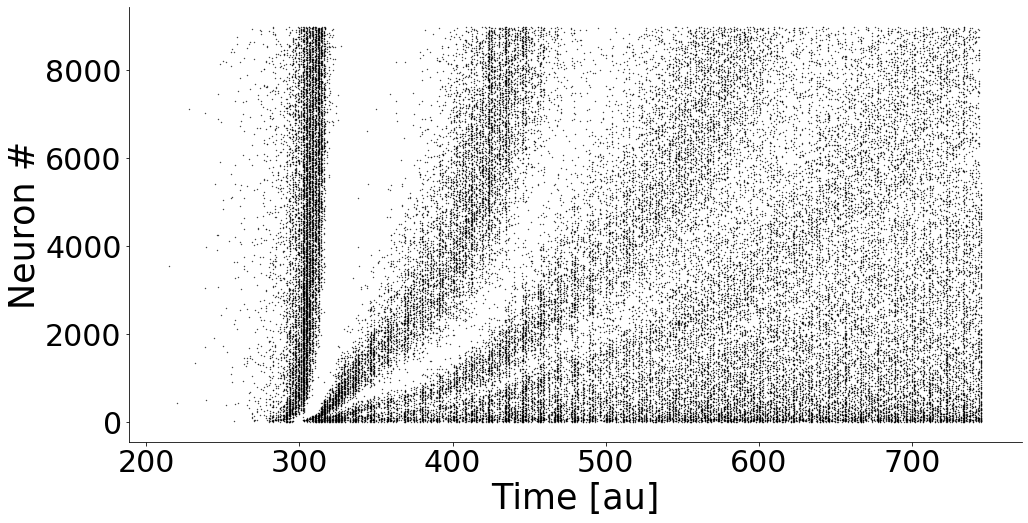

In [447]:
fig, axarr = plt.subplots(figsize = (16,8))
plt.plot(spike_monitor.t[:50000]* 10000, spike_monitor.i[:50000], '.k', markersize = 0.7)
plt.xlabel('Time [au]', size = '35')
plt.ylabel('Neuron #', size = '35')
plt.xticks(size = '30')
plt.yticks(size = '30')

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'model_spikes.png', transparent = True)

plt.show()

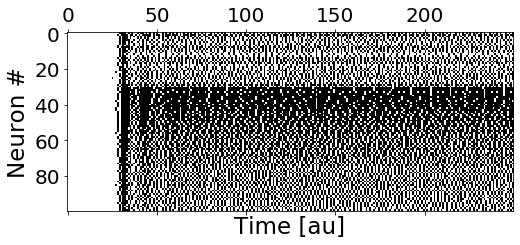

In [448]:
bind = net_fn.bin_data(spikes, N, sim_time)
fig, ax = plt.subplots(figsize= (8,8))
ax.matshow(bind[:100,:250], cmap = 'Greys')
plt.xlabel('Time [au]', size = '23')
plt.ylabel('Neuron #', size = '23')
plt.xticks(size = '20')
plt.yticks(size = '20')

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'model-ds_spikes.svg', transparent = True)
plt.show()

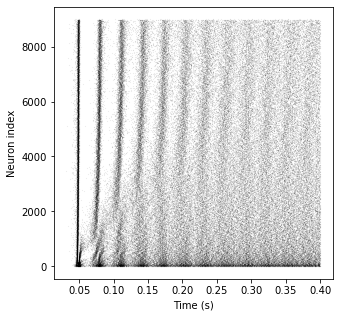

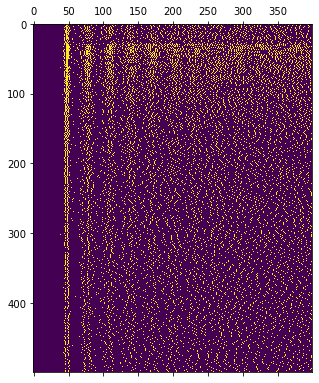

In [306]:
#Visualise network spikes and binning procedure

b2.start_scope()

#Parameters

s = 1.2 
v_th = 20 #spike threshold
k=30

av_vals = [0]

b2.start_scope()
av_list = list(range(len(av_vals)))
v_list = list(range(len(av_vals)))
count=0


for i in (av_vals):

    b2.start_scope()

    # define dynamics for each cell
    lif ="""
        dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
        N, model=lif,
        threshold="v>v_th", reset="v = v_rest",
        method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights
    curr = net_fn.ba_netsim(dist).adjmat_generate(k, s, i, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    v_list[count] = np.asarray(V.v)

    #Plot data
    fig, axarr = plt.subplots(figsize = (5,5))
    plt.plot(spike_monitor.t, spike_monitor.i, '.k', markersize = 0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index');
    plt.show()

    bind = net_fn.bin_data(spikes, N, sim_time)
    fig, ax = plt.subplots(figsize= (5,15))
    ax.matshow(bind[:500])
    plt.show()

# Fit model
* k = 5 - 40 edges
* vth = 15 - 22
* r = 0 - 7
* cost function - bln/pre: cost_mean, p20: cost_max 

In [370]:
os.chdir(F10t + 'Project/' + experiment)
grid_list = sorted(glob.glob('*grid_search_av_nit9_*'))
grid_list[:10]

['grid_search_av_nit9_k-05_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-18_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-19_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-20_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-18_r0-7.npy']

In [375]:
k_vals = np.arange(5, 34, 1)
vth_vals = np.arange(15, 21, 1)
r_vals = np.arange(0, 8, 1)
k_vals, vth_vals, r_vals

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([15, 16, 17, 18, 19, 20]),
 array([0, 1, 2, 3, 4, 5, 6, 7]))

In [376]:
#RUN PARAMETER SWEEP ON NETWORK

def run_par_sim(r, sim_time, k, v_th, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e, net_nnb):
    av_size, av_dur = [],[]
    for i in range(9):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(k), int(v_th), r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        av,pkg = crfn.avalanche_r(net_nnb, bind)
        av_size = np.append(av_size, av[0])
        av_dur = np.append(av_dur, av[1])
    return(av_size, av_dur)

def sort_list(ok):
    count=0
    for i in range(len(ok)):
        for e in range(len(ok[i])):
            count+=1
    new_list = list(range(count))
    n_count = 0
    for i in range(len(ok)):
        new_list[n_count] = ok[i][0]
        n_count+=1
    for i in range(len(ok)):
        new_list[n_count] = ok[i][1]
        n_count+=1
    return(new_list)

In [ ]:
#RUN PARAMETER SWEEP ON NETWORK

savepath = F10t + 'Project/' + experiment + os.sep 

for i in range(len(k_vals)):
    for x in range(len(vth_vals)):
        param_list = [sim_time, k_vals[i],  vth_vals[x], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e, net_nnb]
        ok_s, ok_d = adfn.parallel_func(4, savepath, list(r_vals), run_par_sim, param_list, 'na', 'na', 'NA')
        if len(str(k_vals[i])) == 1:
            name = 'k-0' + str(k_vals[i]) + '_vth-' + str(vth_vals[x])
        else:
            name = 'k-' + str(k_vals[i]) + '_vth-' + str(vth_vals[x])
        np.save(savepath + os.sep + 'grid_search-2_av_nit9_' + name  + '_r0-7_size.npy', ok_s)
        np.save(savepath + os.sep + 'grid_search-2_av_nit9_' + name  + '_r0-7_dur.npy', ok_d)
    print('Done k-' + str(k_vals[i]))

In [372]:
#Combine into one giant list
av_list = list(range(len(grid_list)*8))
count = 0
for i in range(len(grid_list)):
    for e in range(8):
        k = grid_list[i][grid_list[i].find('k-')+2:grid_list[i].find('k-')+4]
        vth = grid_list[i][grid_list[i].find('vth-')+4:grid_list[i].find('vth-')+6]
        r = e
        av_list[count] = [[k, vth, r], np.load(grid_list[i], allow_pickle=True)[e]]
        count+=1

In [21]:
os.chdir(Fdrop + 'Project/' + experiment)
run1_str = sorted(glob.glob('*brute*optimise*bln.*'))[0]
run2_str  = sorted(glob.glob('*brute*optimise*pre.*'))[1]
run1_str, run2_str

('brute_optimise_max_bln.npy', 'brute_optimise_mean_pre.npy')

In [22]:
length = 1225
comb_run = list(range(length))
    
curr1 = np.load(run1_str, allow_pickle=True)
curr2 = np.load(run2_str, allow_pickle=True)
for i in range(length):
    entry_list = list(range(2))
    entry_list[0] = curr1[i][0]
    entry_list[1] = np.append(curr1[i][2][0], curr2[i][2][0])
    comb_run[i] = entry_list

In [48]:
k_vals = np.arange(5, 40, 4)
v_th_vals = np.arange(10,22, 2)
r_vals = np.arange(0,7, 1)

In [10]:
# COST LANDSCAPE - COARSE SWEEP
cost_max_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
cost_mean_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
for k_c, k in enumerate(k_vals):
    for v_th_c, v_th in enumerate(v_th_vals):
        for r_c, r in enumerate(r_vals):
            bind, spikes, volt = netfn.run_net(sim_time, k, v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
            av,pkg = crfn.avalanche_r(net_nnb, bind)
            cost_max, cost_mean = netfn.ks_log(av[0], bln_vec)
            cost_max_vec[k_c][v_th_c][r_c] = cost_max
            cost_mean_vec[k_c][v_th_c][r_c] = cost_mean
    print('Done k - ' + str(k))
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_max', cost_max_vec)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_mean', cost_mean_vec)

Done k - 5
Done k - 9
Done k - 13
Done k - 17
Done k - 21
Done k - 25
Done k - 29
Done k - 33
Done k - 37


In [367]:
os.chdir(Fdrop + 'Project/' + experiment)
bln_sweep_max = sorted(glob.glob('*bln_cost_max*'))
bln_sweep_mean = sorted(glob.glob('*bln_cost_mean*'))
pre_sweep_max = sorted(glob.glob('*pre_cost_max*'))
pre_sweep_mean = sorted(glob.glob('*pre_cost_mean*'))
bln_sweep_max

NameError: name 'Fdrop' is not defined

In [ ]:
#NON-CONVEX FUNCTION - MULTIPLE LOCAL MINIMA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = np.load(bln_sweep_mean[0])
plt.figure(figsize=(6,6))
for i in range(len(k_vals)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().locator_params(axis='y', nbins=len(v_th_vals))
    plt.gca().locator_params(axis='x', nbins=len(r_vals))
    plt.gca().set_xticklabels(np.append(0,  r_vals) , fontsize = 10)
    plt.gca().set_yticklabels(np.append(0,v_th_vals), fontsize = 10)
plt.show()

### Fit to baseline

In [381]:
alpha = 0.09
#BLN fit
empirical = bln_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 3,alpha)
    mse_list_c[i] = MSE_B 
    
bln_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
bln_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
bln_mse =  np.min(mse_list_c)
bln_par, bln_mse

(['07', '20', 5], 0.11255861965070757)

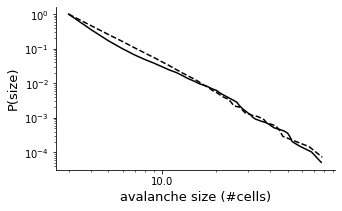

In [409]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### Fit to preseizure


In [411]:
#PRE fit
empirical = pre_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
pre_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
pre_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
pre_mse =  np.min(mse_list_c)
pre_par, pre_mse

(['06', '16', 0], 0.1763710618853667)

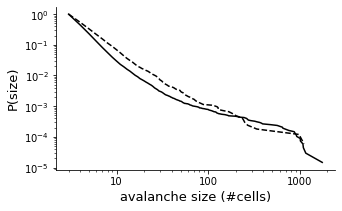

In [412]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### Fit to seizure


In [413]:
#SZ fit
empirical = p20_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
sz_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
sz_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
sz_mse =  np.min(mse_list_c)
sz_par, sz_mse

(['31', '17', 1], 0.11964590052692564)

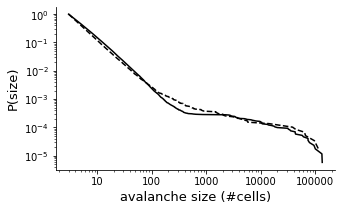

In [414]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

## Baseline - preictal 

In [442]:
bln_k = 7
bln_vth = 20
bln_r = 5
bln_k, bln_vth, bln_r

(7, 20, 5)

### 2 parameters free

In [418]:
#K and Vth free
const_list = ['r']
val_list = ['5']
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [420]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
kvth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_pre_mse = np.min(mse_list)
print(kvth_pre_par)
print('MSE = ' + str(np.min(kvth_pre_mse)))

['06', '18', 5]
MSE = 0.21156637841836867


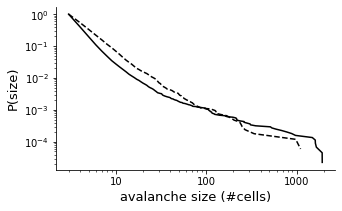

In [421]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

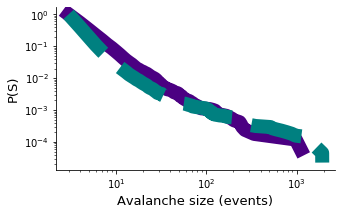

In [430]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'indigo')
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'teal') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_kvth.svg', transparent = True)
plt.show()

In [432]:
#K and r free
const_list = ['v_th']
val_list = ['20']
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [433]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 2, alpha)
    mse_list[i] = MSE_B
    
kr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_pre_mse = np.min(mse_list)
print(kr_pre_par)
print('MSE = ' + str(np.min(kr_pre_mse)))

['09', '20', 4]
MSE = 0.19616261215068936


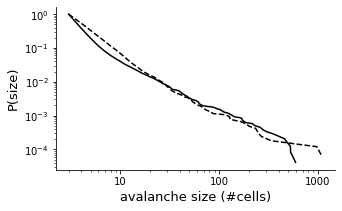

In [434]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

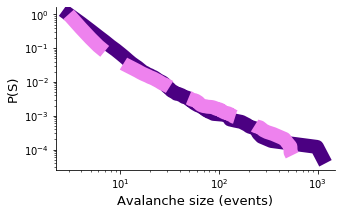

In [437]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'indigo')
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'violet') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_kr.svg', transparent = True)
plt.show()

In [444]:
#vth and r free
const_list = ['k']
val_list = ['07']
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [445]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
vthr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_pre_mse = np.min(mse_list)
print(vthr_pre_par)
print('MSE = ' + str(np.min(vthr_pre_mse)))

['07', '19', 4]
MSE = 0.22307113765428127


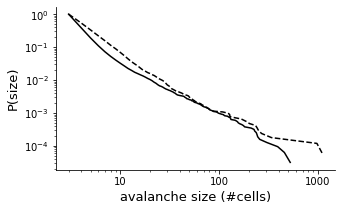

In [446]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

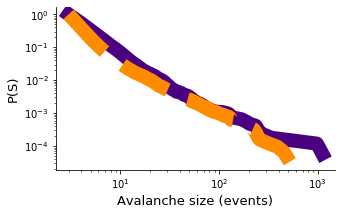

In [448]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'indigo')
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'darkorange') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_vthr.svg', transparent = True)
plt.show()

### 1 parameter free

In [27]:
bln_k = '07'
bln_vth = '20'
bln_r = '5'
bln_k, bln_vth, bln_r

('07', '20', '5')

In [28]:
#k free
const_list = ['v_th', 'r']
val_list = [bln_vth, bln_r]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [29]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
k_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_pre_mse = np.min(mse_list)
print(k_pre_par)
print('MSE = ' + str(np.min(k_pre_mse)))

['15', '20', 5]
MSE = 0.2408534472651233


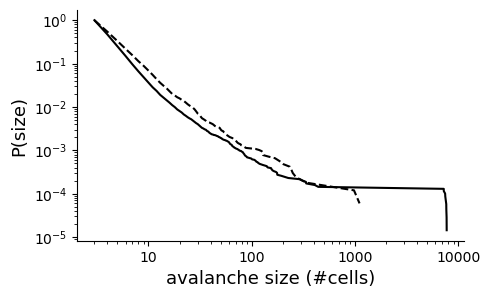

In [30]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [31]:
#vth free
const_list = ['k', 'r']
val_list = [bln_k, bln_r]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [32]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model,1, alpha)
    mse_list[i] = MSE_B
    
vth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_pre_mse = np.min(mse_list)
print(vth_pre_par)
print('MSE = ' + str(np.min(vth_pre_mse)))

['07', '19', 5]
MSE = 0.2234666572836279


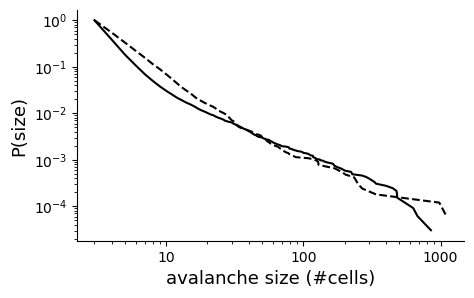

In [33]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [34]:
#r free
const_list = ['k', 'v_th']
val_list = [bln_k, bln_vth]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [35]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1,alpha)
    mse_list[i] = MSE_B
    
r_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_pre_mse = np.min(mse_list)
print(r_pre_par)
print('MSE = ' + str(np.min(r_pre_mse)))

['07', '20', 6]
MSE = 1.0595816410003382


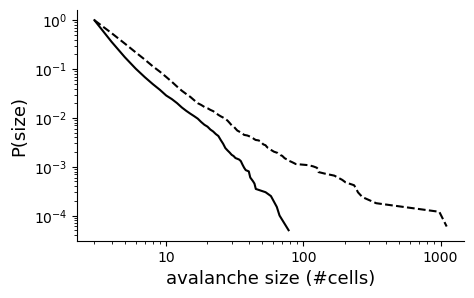

In [36]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

## Preictal - ictal 

In [449]:
pre_k = '06'
pre_vth = '16'
pre_r = '0'
pre_k, pre_vth, pre_r

('06', '16', '0')

### 2 parameters free

In [450]:
#K and Vth free
const_list = ['r']
val_list = [pre_r]
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [451]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 2,alpha)
    mse_list[i] = MSE_B
    
kvth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_sz_mse = np.min(mse_list)
print(kvth_sz_par)
print('MSE = ' + str(np.min(kvth_sz_mse)))

['33', '17', 0]
MSE = 0.15896572690273386


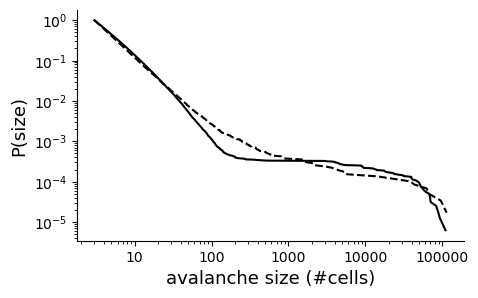

In [40]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

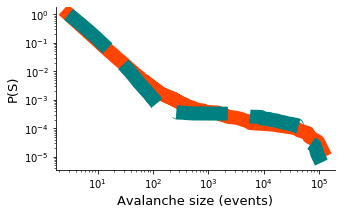

In [455]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'orangered')
av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'teal') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_sz_kvth.svg', transparent = True)
plt.show()

In [ ]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'indigo')
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'teal') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_kvth.svg', transparent = True)
plt.show()

In [457]:
#K and r free
const_list = ['v_th']
val_list = [pre_vth]
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [458]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model, 2,alpha)
    mse_list[i] = MSE_B
    
kr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_sz_mse = np.min(mse_list)
print(kr_sz_par)
print('MSE = ' + str(np.min(kr_sz_mse)))

['15', '16', 7]
MSE = 0.16013689065047


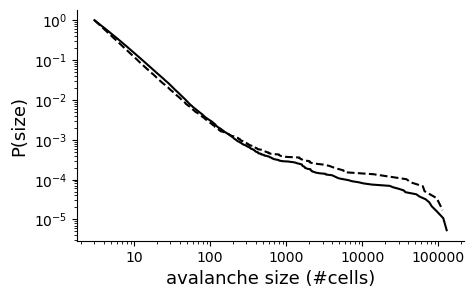

In [43]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

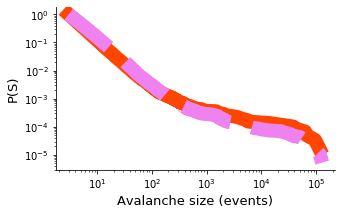

In [460]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'orangered')
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'violet') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_sz_kr.svg', transparent = True)
plt.show()

In [462]:
#vth and r free
const_list = ['k']
val_list = [pre_k]
data = av_list
sub_list = net_fn.sub_sweep(data, const_list, val_list)

In [463]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = net_fn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
vthr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_sz_mse = np.min(mse_list)
print(vthr_sz_par)
print('MSE = ' + str(np.min(vthr_sz_mse)))

['06', '17', 6]
MSE = 0.4288571461200695


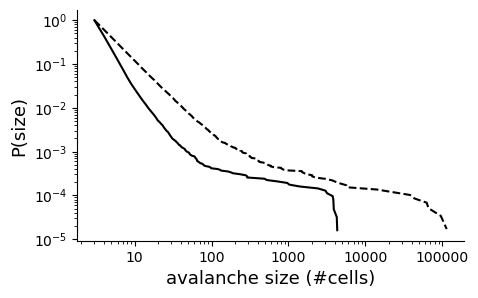

In [46]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

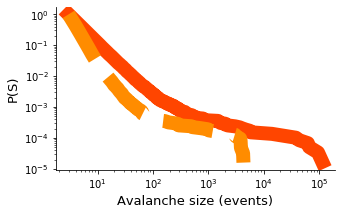

In [464]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =14 , markersize = 1, alpha = 1, c = 'orangered')
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =14 , markersize = 1, alpha = 1, c = 'darkorange') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_sz_vthr.svg', transparent = True)
plt.show()

### 1 parameter free

In [47]:
#k free
const_list = ['r', 'v_th']
val_list = [pre_r, pre_vth]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [48]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
k_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_sz_mse = np.min(mse_list)
print(k_sz_par)
print('MSE = ' + str(np.min(k_sz_mse)))

['30', '16', 0]
MSE = 0.19047626325960737


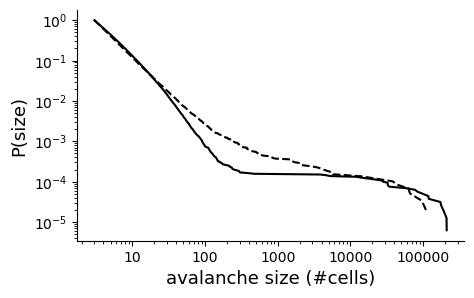

In [49]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [50]:
#vth free
const_list = ['r', 'k']
val_list = [pre_r, pre_k]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [51]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
vth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_sz_mse = np.min(mse_list)
print(vth_sz_par)
print('MSE = ' + str(np.min(vth_sz_mse)))

['06', '15', 0]
MSE = 0.7435775253454853


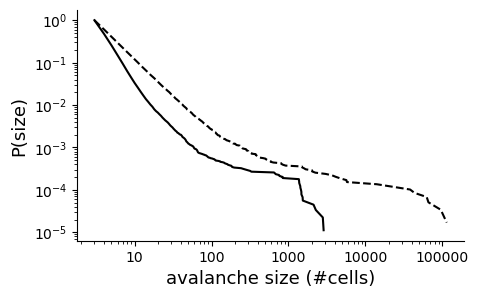

In [52]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [53]:
#r free
const_list = ['v_th','k']
val_list = [pre_vth, pre_k]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [54]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1,alpha)
    mse_list[i] = MSE_B
    
r_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_sz_mse = np.min(mse_list)
print(r_sz_par)
print('MSE = ' + str(np.min(r_sz_mse)))

['06', '16', 7]
MSE = 0.46151614409489883


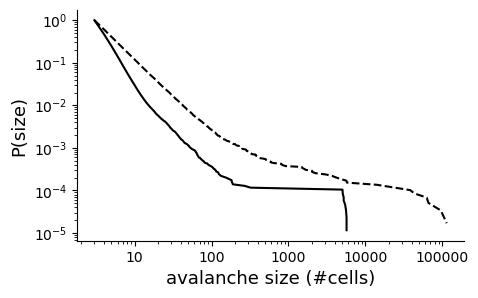

In [55]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

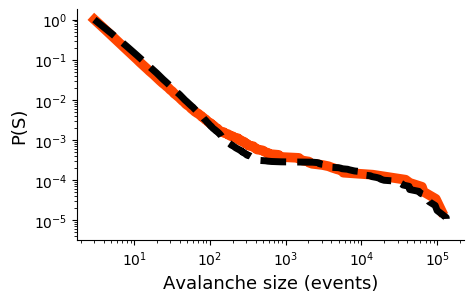

In [62]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'orangered')
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'k') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_sz_allpar.svg', transparent = True)
plt.show()

# Model comparison

In [84]:
pre_mse_list = [pre_mse, kr_pre_mse, kvth_pre_mse, vthr_pre_mse, k_pre_mse, r_pre_mse, vth_pre_mse]
pre_av_list = [pre_fit, kr_pre_fit, kvth_pre_fit, vthr_pre_fit, k_pre_fit, r_pre_fit, vth_pre_fit]
sz_mse_list = [sz_mse, kr_sz_mse, kvth_sz_mse, vthr_sz_mse, k_sz_mse, r_sz_mse, vth_sz_mse]
sz_av_list = [sz_fit, kr_sz_fit, kvth_sz_fit, vthr_sz_fit, k_sz_fit, r_sz_fit, vth_sz_fit]
name_list = ['all', 'm + r', 'm + Vth','Vth + r', 'm', 'r', 'Vth']
par_list = [3, 2, 2, 2, 1, 1, 1]
n_obv = 100000

#def AIC(mse, k, n):
#    return(n*(np.log(mse)) + (2*k))

def AIC(mse, k, n):
    return(mse + k*((n-1)/(n-k)))

def AIC(mse, k, n):
    return(mse + k*((n-1)/(n-k)))

curr_av = pre_av_list
curr_mse = pre_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


pre_mse_df = {}
pre_mse_df = pd.DataFrame({"MSE":pre_mse_list , "Labels":  name_list})
pre_aic_df = {}
pre_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

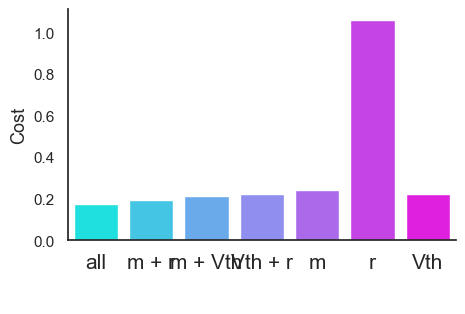

In [91]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(pre_mse_df)))
sns.set(style="white")
fig, axarr = plt.subplots(figsize = (5,3))
ax = sns.barplot(x="Labels", y="MSE", data = pre_mse_df, hue = 'Labels', palette = colors, dodge = False)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('Cost', size = '13')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'model_cost_pre.svg', transparent = True)
plt.show()


In [92]:
curr_av = sz_av_list
curr_mse = sz_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


sz_mse_df = {}
sz_mse_df = pd.DataFrame({"MSE":sz_mse_list , "Labels":  name_list})
sz_aic_df = {}
sz_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

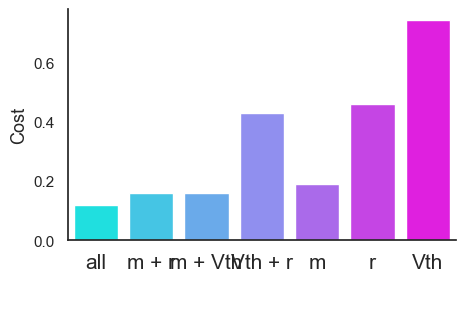

In [93]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(pre_mse_df)))
sns.set(style="white")
fig, axarr = plt.subplots(figsize = (5,3))
ax = sns.barplot(x="Labels", y="MSE", data = sz_mse_df, hue = 'Labels', palette = colors, dodge = False)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('Cost', size = '13')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'model_cost_sz.svg', transparent = True)
plt.show()
